# Exploratory Analysis of  UVA Flow data

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
#Read in data as csv and set columns

data02_13 = pd.read_csv('/Users/julinazhang/Desktop/new sample/netFlow-02-13 -2017.csv', sep = ',')
data02_14 = pd.read_csv('/Users/julinazhang/Desktop/new sample/netFlow-02-14-2017.csv', sep = ',')
data02_15 = pd.read_csv('/Users/julinazhang/Desktop/new sample/netFlow-02-15-2017_2.csv', sep = ',')
data02_16 = pd.read_csv('/Users/julinazhang/Desktop/new sample/netFlow-02-16-2017.csv', sep = ',')
data02_17 = pd.read_csv('/Users/julinazhang/Desktop/new sample/netFlow-02-17-2017.csv', sep = ',')



In [3]:
data02_13.drop(['Unnamed: 0', 'id', 'maxrate'], axis=1, inplace=True)
data02_14.drop(['Unnamed: 0', 'id', 'maxrate'], axis=1, inplace=True)
data02_15.drop(['Unnamed: 0', 'id', 'maxrate'], axis=1, inplace=True)
data02_16.drop(['Unnamed: 0', 'id', 'maxrate'], axis=1, inplace=True)
data02_17.drop(['Unnamed: 0', 'id', 'maxrate'], axis=1, inplace=True)

In [4]:
data02_13.head()

,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime
0,73.216.232.91,128.143.22.38,62557,443,6,24652,76,7.324,26927.36,2017-02-13 14:11:48.276,2017-02-13 14:11:55.600
1,128.143.221.51,91.71.127.220,53,13420,17,328,4,0.000,0.00,2017-02-13 14:14:57.968,2017-02-13 14:14:57.968
2,128.143.221.34,104.0.225.151,53,44953,17,336,4,0.000,0.00,2017-02-13 14:18:27.688,2017-02-13 14:18:27.688
3,173.194.175.27,128.143.2.164,25,41160,6,25432,100,0.407,499891.81,2017-02-13 14:05:47.370,2017-02-13 14:05:47.856
4,128.143.59.98,213.227.88.19,53,52449,17,400,4,0.000,0.00,2017-02-13 14:09:54.336,2017-02-13 14:09:54.336


In [5]:
data02_13.firstTime = pd.to_datetime(data02_13.firstTime).dt.time
data02_14.firstTime = pd.to_datetime(data02_14.firstTime).dt.time
data02_15.firstTime = pd.to_datetime(data02_15.firstTime).dt.time
data02_16.firstTime = pd.to_datetime(data02_16.firstTime).dt.time
data02_17.firstTime = pd.to_datetime(data02_17.firstTime).dt.time


In [6]:
data02_13.firstTime.head()

0    14:11:48.276000
1    14:14:57.968000
2    14:18:27.688000
3    14:05:47.370000
4    14:09:54.336000
Name: firstTime, dtype: object

In [7]:
data02_13.lastTime = pd.to_datetime(data02_13.lastTime).dt.time
data02_14.lastTime = pd.to_datetime(data02_14.lastTime).dt.time
data02_15.lastTime = pd.to_datetime(data02_15.lastTime).dt.time
data02_16.lastTime = pd.to_datetime(data02_16.lastTime).dt.time
data02_17.lastTime = pd.to_datetime(data02_17.lastTime).dt.time

In [8]:
data02_13.firstTime.tail()

11277308    04:38:03.340000
11277309    04:39:14.748000
11277310    04:32:40.787000
11277311    04:51:28.576000
11277312    04:35:23.037000
Name: firstTime, dtype: object

In [9]:
three_am = pd.to_datetime('08:00:00.0').time()

In [10]:
data02_13_midnight = data02_13[data02_13.firstTime < three_am]
data02_13_morning = data02_13[data02_13.firstTime > three_am]


data02_14_midnight = data02_14[data02_14.firstTime < three_am]
data02_14_morning = data02_14[data02_14.firstTime > three_am]

data02_15_midnight = data02_15[data02_15.firstTime < three_am]
data02_15_morning = data02_15[data02_15.firstTime > three_am]

data02_16_midnight = data02_16[data02_16.firstTime < three_am]
data02_16_morning = data02_16[data02_16.firstTime > three_am]

data02_17_midnight = data02_17[data02_17.firstTime < three_am]
data02_17_morning = data02_17[data02_17.firstTime > three_am]

In [11]:
#Sanity check: looks right
#len(data02_13_midnight)
#len(data02_13_morning)
#len(data02_13)

data02_13_morning.head()
data02_13_morning.tail()

#firstTime - 5:00 = Eastern Time

,srcAddr,dstAddr,srcPort,dstPort,prot,bytes,pkts,dur,rate,firstTime,lastTime
6220106,218.65.30.156,128.143.57.195,28617,22,6,400,8,3.561,898.62,14:32:43.766000,14:32:47.327000
6220107,128.143.2.7,34.248.196.167,53,28990,17,384,4,0.000,0.00,14:33:10.069000,14:33:10.069000
6220108,128.143.8.72,76.123.5.119,443,49472,6,3072,32,0.115,213704.33,14:28:48.495000,14:28:49.352000
6220109,45.76.154.102,128.143.136.11,25565,6670,6,160,4,0.000,0.00,14:36:00.856000,14:36:00.856000
6220110,128.143.6.103,218.65.30.156,22,18653,6,15076,112,3.714,32473.88,14:32:17.225000,14:32:20.939000


# 02/13 - 02/17 Morning Collab (128.143.2.75 & Port 80)

In [17]:
data02_13_morning_collab = data02_13_morning[((data02_13_morning.srcAddr == '128.143.2.75') & (data02_13_morning.srcPort == 80)) | ((data02_13_morning.dstAddr =='128.143.2.75') & (data02_13_morning.dstPort == 80))]
len(data02_13_morning_collab) 

data02_14_morning_collab = data02_14_morning[((data02_14_morning.srcAddr == '128.143.2.75') & (data02_14_morning.srcPort == 80)) | ((data02_14_morning.dstAddr =='128.143.2.75') & (data02_14_morning.dstPort == 80))]
len(data02_14_morning_collab) 

data02_15_morning_collab = data02_15_morning[((data02_15_morning.srcAddr == '128.143.2.75') & (data02_15_morning.srcPort == 80)) | ((data02_15_morning.dstAddr =='128.143.2.75') & (data02_15_morning.dstPort == 80))]
len(data02_15_morning_collab) 

data02_16_morning_collab = data02_16_morning[((data02_16_morning.srcAddr == '128.143.2.75') & (data02_16_morning.srcPort == 80)) | ((data02_16_morning.dstAddr =='128.143.2.75') & (data02_16_morning.dstPort == 80))]
len(data02_16_morning_collab) 

data02_17_morning_collab = data02_17_morning[((data02_17_morning.srcAddr == '128.143.2.75') & (data02_17_morning.srcPort == 80)) | ((data02_17_morning.dstAddr =='128.143.2.75') & (data02_17_morning.dstPort == 80))]
len(data02_17_morning_collab) 


142

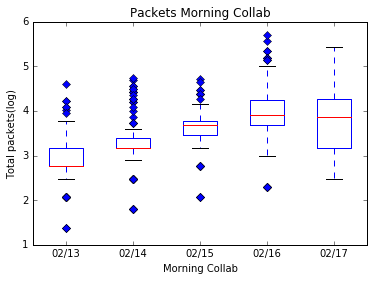

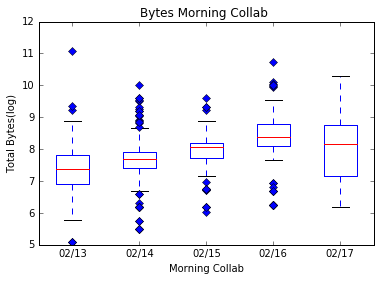

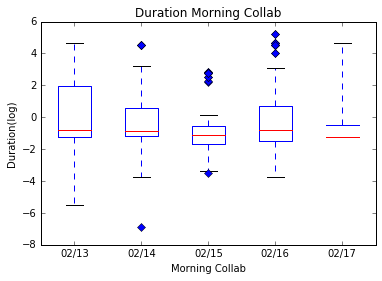

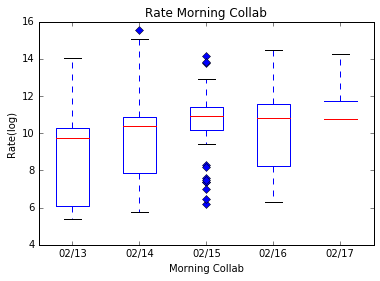

In [18]:
data02_13_morning_collab_pkts =  np.log(data02_13_morning_collab.pkts)
data02_13_morning_collab_bytes = np.log(data02_13_morning_collab.bytes)
data02_13_morning_collab_dur = np.log(data02_13_morning_collab.dur)
data02_13_morning_collab_rate = np.log(data02_13_morning_collab.rate)

data02_14_morning_collab_pkts =  np.log(data02_14_morning_collab.pkts)
data02_14_morning_collab_bytes = np.log(data02_14_morning_collab.bytes)
data02_14_morning_collab_dur = np.log(data02_14_morning_collab.dur)
data02_14_morning_collab_rate = np.log(data02_14_morning_collab.rate)

data02_15_morning_collab_pkts =  np.log(data02_15_morning_collab.pkts)
data02_15_morning_collab_bytes = np.log(data02_15_morning_collab.bytes)
data02_15_morning_collab_dur = np.log(data02_15_morning_collab.dur)
data02_15_morning_collab_rate = np.log(data02_15_morning_collab.rate)

data02_16_morning_collab_pkts =  np.log(data02_16_morning_collab.pkts)
data02_16_morning_collab_bytes = np.log(data02_16_morning_collab.bytes)
data02_16_morning_collab_dur = np.log(data02_16_morning_collab.dur)
data02_16_morning_collab_rate = np.log(data02_16_morning_collab.rate)

data02_17_morning_collab_pkts =  np.log(data02_17_morning_collab.pkts)
data02_17_morning_collab_bytes = np.log(data02_17_morning_collab.bytes)
data02_17_morning_collab_dur = np.log(data02_17_morning_collab.dur)
data02_17_morning_collab_rate = np.log(data02_17_morning_collab.rate)


Time = ['02/13','02/14','02/15','02/16', '02/17']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()

ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([data02_13_morning_collab_pkts, data02_14_morning_collab_pkts, data02_15_morning_collab_pkts, data02_16_morning_collab_pkts, data02_17_morning_collab_pkts], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([data02_13_morning_collab_bytes, data02_14_morning_collab_bytes, data02_15_morning_collab_bytes, data02_16_morning_collab_bytes, data02_17_morning_collab_bytes], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([data02_13_morning_collab_dur, data02_14_morning_collab_dur, data02_15_morning_collab_dur, data02_16_morning_collab_dur, data02_17_morning_collab_dur], 0, 'gD')
ax4 = fig4.add_subplot(111)
bp4 = ax4.boxplot([data02_13_morning_collab_rate, data02_14_morning_collab_rate, data02_15_morning_collab_rate, data02_16_morning_collab_rate, data02_17_morning_collab_rate], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets Morning Collab')
ax1.set_xlabel('Morning Collab')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes Morning Collab ')
ax2.set_xlabel('Morning Collab')
ax2.set_ylabel('Total Bytes(log)')
xtickNames = plt.setp(ax2, xticklabels= Time)


ax3.set_axisbelow(True)
ax3.set_title('Duration Morning Collab')
ax3.set_xlabel('Morning Collab')
ax3.set_ylabel('Duration(log)')
xtickNames = plt.setp(ax3, xticklabels= Time)


ax4.set_axisbelow(True)
ax4.set_title('Rate Morning Collab')
ax4.set_xlabel('Morning Collab')
ax4.set_ylabel('Rate(log)')
xtickNames = plt.setp(ax4, xticklabels= Time)

plt.show()



# 02/13 - 02/17 Morning ECE (128.143.11.107 & Port 80)

In [19]:
data02_13_morning_Ece = data02_13_morning[((data02_13_morning.srcAddr == '128.143.11.107') & (data02_13_morning.srcPort == 80)) | ((data02_13_morning.dstAddr =='128.143.11.107') & (data02_13_morning.dstPort == 80))]
len(data02_13_morning_Ece) 

data02_14_morning_Ece = data02_14_morning[((data02_14_morning.srcAddr == '128.143.11.107') & (data02_14_morning.srcPort == 80)) | ((data02_14_morning.dstAddr =='128.143.11.107') & (data02_14_morning.dstPort == 80))]
len(data02_14_morning_Ece) 

data02_15_morning_Ece = data02_15_morning[((data02_15_morning.srcAddr == '128.143.11.107') & (data02_15_morning.srcPort == 80)) | ((data02_15_morning.dstAddr =='128.143.11.107') & (data02_15_morning.dstPort == 80))]
len(data02_15_morning_Ece) 

data02_16_morning_Ece = data02_16_morning[((data02_16_morning.srcAddr == '128.143.11.107') & (data02_16_morning.srcPort == 80)) | ((data02_16_morning.dstAddr =='128.143.11.107') & (data02_16_morning.dstPort == 80))]
len(data02_16_morning_Ece) 

data02_17_morning_Ece = data02_17_morning[((data02_17_morning.srcAddr == '128.143.11.107') & (data02_17_morning.srcPort == 80)) | ((data02_17_morning.dstAddr =='128.143.11.107') & (data02_17_morning.dstPort == 80))]
len(data02_17_morning_Ece) 

809

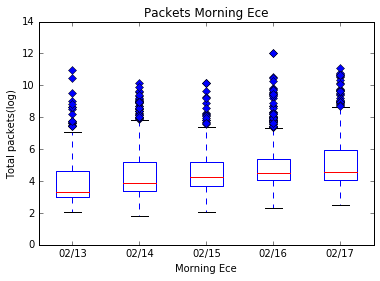

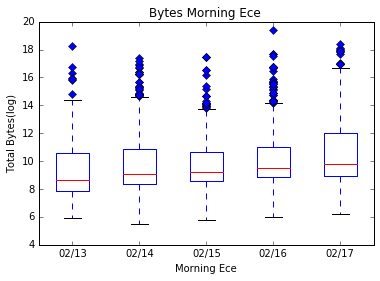

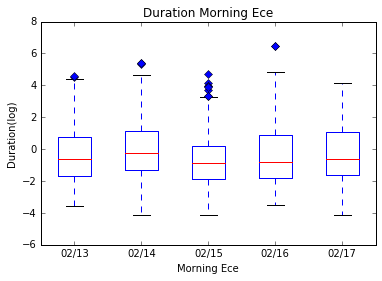

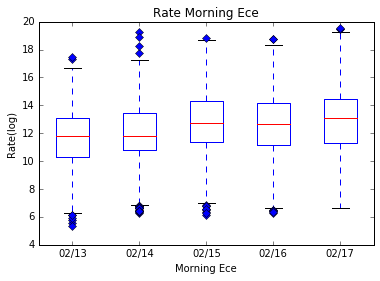

In [20]:
data02_13_morning_Ece_pkts =  np.log(data02_13_morning_Ece.pkts)
data02_13_morning_Ece_bytes = np.log(data02_13_morning_Ece.bytes)
data02_13_morning_Ece_dur = np.log(data02_13_morning_Ece.dur)
data02_13_morning_Ece_rate = np.log(data02_13_morning_Ece.rate)

data02_14_morning_Ece_pkts =  np.log(data02_14_morning_Ece.pkts)
data02_14_morning_Ece_bytes = np.log(data02_14_morning_Ece.bytes)
data02_14_morning_Ece_dur = np.log(data02_14_morning_Ece.dur)
data02_14_morning_Ece_rate = np.log(data02_14_morning_Ece.rate)

data02_15_morning_Ece_pkts =  np.log(data02_15_morning_Ece.pkts)
data02_15_morning_Ece_bytes = np.log(data02_15_morning_Ece.bytes)
data02_15_morning_Ece_dur = np.log(data02_15_morning_Ece.dur)
data02_15_morning_Ece_rate = np.log(data02_15_morning_Ece.rate)

data02_16_morning_Ece_pkts =  np.log(data02_16_morning_Ece.pkts)
data02_16_morning_Ece_bytes = np.log(data02_16_morning_Ece.bytes)
data02_16_morning_Ece_dur = np.log(data02_16_morning_Ece.dur)
data02_16_morning_Ece_rate = np.log(data02_16_morning_Ece.rate)

data02_17_morning_Ece_pkts =  np.log(data02_17_morning_Ece.pkts)
data02_17_morning_Ece_bytes = np.log(data02_17_morning_Ece.bytes)
data02_17_morning_Ece_dur = np.log(data02_17_morning_Ece.dur)
data02_17_morning_Ece_rate = np.log(data02_17_morning_Ece.rate)


Time = ['02/13','02/14','02/15','02/16', '02/17']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()

ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([data02_13_morning_Ece_pkts, data02_14_morning_Ece_pkts, data02_15_morning_Ece_pkts, data02_16_morning_Ece_pkts, data02_17_morning_Ece_pkts], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([data02_13_morning_Ece_bytes, data02_14_morning_Ece_bytes, data02_15_morning_Ece_bytes, data02_16_morning_Ece_bytes, data02_17_morning_Ece_bytes], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([data02_13_morning_Ece_dur, data02_14_morning_Ece_dur, data02_15_morning_Ece_dur, data02_16_morning_Ece_dur, data02_17_morning_Ece_dur], 0, 'gD')
ax4 = fig4.add_subplot(111)
bp4 = ax4.boxplot([data02_13_morning_Ece_rate, data02_14_morning_Ece_rate, data02_15_morning_Ece_rate, data02_16_morning_Ece_rate, data02_17_morning_Ece_rate], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets Morning Ece')
ax1.set_xlabel('Morning Ece')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes Morning Ece ')
ax2.set_xlabel('Morning Ece')
ax2.set_ylabel('Total Bytes(log)')
xtickNames = plt.setp(ax2, xticklabels= Time)


ax3.set_axisbelow(True)
ax3.set_title('Duration Morning Ece')
ax3.set_xlabel('Morning Ece')
ax3.set_ylabel('Duration(log)')
xtickNames = plt.setp(ax3, xticklabels= Time)


ax4.set_axisbelow(True)
ax4.set_title('Rate Morning Ece')
ax4.set_xlabel('Morning Ece')
ax4.set_ylabel('Rate(log)')
xtickNames = plt.setp(ax4, xticklabels= Time)

plt.show()

# 02/13 - 02/17 Morning Pages (128.143.21.137 & Port 80)


In [21]:
data02_13_morning_Pages = data02_13_morning[((data02_13_morning.srcAddr == '128.143.21.137') & (data02_13_morning.srcPort == 80)) | ((data02_13_morning.dstAddr =='128.143.21.137') & (data02_13_morning.dstPort == 80))]
len(data02_13_morning_Pages) 

data02_14_morning_Pages = data02_14_morning[((data02_14_morning.srcAddr == '128.143.21.137') & (data02_14_morning.srcPort == 80)) | ((data02_14_morning.dstAddr =='128.143.21.137') & (data02_14_morning.dstPort == 80))]
len(data02_14_morning_Pages) 

data02_15_morning_Pages = data02_15_morning[((data02_15_morning.srcAddr == '128.143.21.137') & (data02_15_morning.srcPort == 80)) | ((data02_15_morning.dstAddr =='128.143.21.137') & (data02_15_morning.dstPort == 80))]
len(data02_15_morning_Pages) 

data02_16_morning_Pages = data02_16_morning[((data02_16_morning.srcAddr == '128.143.21.137') & (data02_16_morning.srcPort == 80)) | ((data02_16_morning.dstAddr =='128.143.21.137') & (data02_16_morning.dstPort == 80))]
len(data02_16_morning_Pages) 

data02_17_morning_Pages = data02_17_morning[((data02_17_morning.srcAddr == '128.143.21.137') & (data02_17_morning.srcPort == 80)) | ((data02_17_morning.dstAddr =='128.143.21.137') & (data02_17_morning.dstPort == 80))]
len(data02_17_morning_Pages)



5555

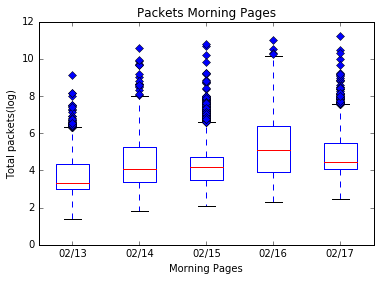

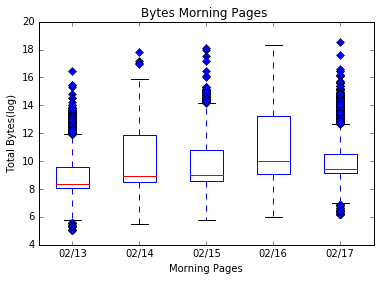

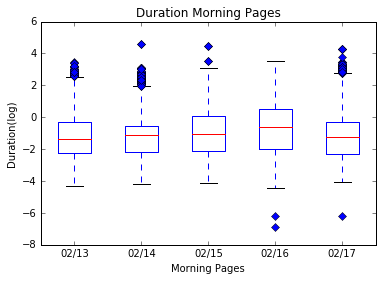

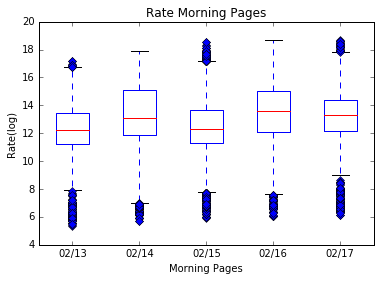

In [22]:
data02_13_morning_Pages_pkts =  np.log(data02_13_morning_Pages.pkts)
data02_13_morning_Pages_bytes = np.log(data02_13_morning_Pages.bytes)
data02_13_morning_Pages_dur = np.log(data02_13_morning_Pages.dur)
data02_13_morning_Pages_rate = np.log(data02_13_morning_Pages.rate)

data02_14_morning_Pages_pkts =  np.log(data02_14_morning_Pages.pkts)
data02_14_morning_Pages_bytes = np.log(data02_14_morning_Pages.bytes)
data02_14_morning_Pages_dur = np.log(data02_14_morning_Pages.dur)
data02_14_morning_Pages_rate = np.log(data02_14_morning_Pages.rate)

data02_15_morning_Pages_pkts =  np.log(data02_15_morning_Pages.pkts)
data02_15_morning_Pages_bytes = np.log(data02_15_morning_Pages.bytes)
data02_15_morning_Pages_dur = np.log(data02_15_morning_Pages.dur)
data02_15_morning_Pages_rate = np.log(data02_15_morning_Pages.rate)

data02_16_morning_Pages_pkts =  np.log(data02_16_morning_Pages.pkts)
data02_16_morning_Pages_bytes = np.log(data02_16_morning_Pages.bytes)
data02_16_morning_Pages_dur = np.log(data02_16_morning_Pages.dur)
data02_16_morning_Pages_rate = np.log(data02_16_morning_Pages.rate)

data02_17_morning_Pages_pkts =  np.log(data02_17_morning_Pages.pkts)
data02_17_morning_Pages_bytes = np.log(data02_17_morning_Pages.bytes)
data02_17_morning_Pages_dur = np.log(data02_17_morning_Pages.dur)
data02_17_morning_Pages_rate = np.log(data02_17_morning_Pages.rate)


Time = ['02/13','02/14','02/15','02/16', '02/17']


fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()

ax1 = fig1.add_subplot(111)
bp = ax1.boxplot([data02_13_morning_Pages_pkts, data02_14_morning_Pages_pkts, data02_15_morning_Pages_pkts, data02_16_morning_Pages_pkts, data02_17_morning_Pages_pkts], 0, 'gD') 
ax2 = fig2.add_subplot(111)
bp2 = ax2.boxplot([data02_13_morning_Pages_bytes, data02_14_morning_Pages_bytes, data02_15_morning_Pages_bytes, data02_16_morning_Pages_bytes, data02_17_morning_Pages_bytes], 0, 'gD') 
ax3 = fig3.add_subplot(111)
bp3 = ax3.boxplot([data02_13_morning_Pages_dur, data02_14_morning_Pages_dur, data02_15_morning_Pages_dur, data02_16_morning_Pages_dur, data02_17_morning_Pages_dur], 0, 'gD')
ax4 = fig4.add_subplot(111)
bp4 = ax4.boxplot([data02_13_morning_Pages_rate, data02_14_morning_Pages_rate, data02_15_morning_Pages_rate, data02_16_morning_Pages_rate, data02_17_morning_Pages_rate], 0, 'gD') 

ax1.set_axisbelow(True)
ax1.set_title('Packets Morning Pages')
ax1.set_xlabel('Morning Pages')
ax1.set_ylabel('Total packets(log)')
xtickNames = plt.setp(ax1, xticklabels= Time)

ax2.set_axisbelow(True)
ax2.set_title('Bytes Morning Pages ')
ax2.set_xlabel('Morning Pages')
ax2.set_ylabel('Total Bytes(log)')
xtickNames = plt.setp(ax2, xticklabels= Time)


ax3.set_axisbelow(True)
ax3.set_title('Duration Morning Pages')
ax3.set_xlabel('Morning Pages')
ax3.set_ylabel('Duration(log)')
xtickNames = plt.setp(ax3, xticklabels= Time)


ax4.set_axisbelow(True)
ax4.set_title('Rate Morning Pages')
ax4.set_xlabel('Morning Pages')
ax4.set_ylabel('Rate(log)')
xtickNames = plt.setp(ax4, xticklabels= Time)

plt.show()
